<h1>EdNet - Optimize Student Performance: Data Wrangling</h1>

Project GitHub: https://github.com/premonish/EdNet<p>


<b>EdNet is composed of a total of 131,441,538 interactions collected from 784,309 students of Santa since 2017.</b>

"Dataset:
As we said, there are four datasets named KT1, KT2, KT3, and KT4 with different extents. Here's common features of these datasets:

The whole dataset is divided by students: {user_id}.csv only contains {user_id}'s interactions.
The timestamps are different from the real values, which are modified (shifted by fixed values) due to security issues.
Download links
EdNet-KT1 : bit.ly/ednet_kt1
EdNet-KT2 : bit.ly/ednet-kt2
EdNet-KT3 : bit.ly/ednet-kt3
EdNet-KT4 : bit.ly/ednet-kt4
Contents : bit.ly/ednet-content"
    
SOURCE: https://github.com/riiid/ednet.git

In [1]:
# I get by with a little help from my friends
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import glob

In [2]:
cd ~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-KT4/KT4

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data\raw\EdNet-KT4\KT4


In [3]:
# file locations
prefix = '~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-'
folder_1 = prefix + 'KT1/KT1/'
folder_2 = prefix + 'KT2/KT2/'
folder_3 = prefix + 'KT3/KT3/'
folder_4 = prefix + 'KT4/KT4/'
questions = prefix + 'Contents/contents/questions.csv'
questions_df = pd.read_csv(questions)

# create a list of the csv files in current directory
csv_files = glob.glob('*.csv')

In [33]:
csv_files[54]
len(csv_files)

297915

In [32]:
# choose file # from csv_files
z = 1555

# create pathname
# create pandas dataframe
# extract user_id from filename and assign user_id as value to column[0], 'user_id'
one = pd.read_csv(folder_1 + csv_files[z])
one.insert(0, 'user_id', csv_files[z].split('.')[0])

# add desired columns and fill with '0'
one['action_type'] = 0
one['item_id'] = 0
one['source'] = 0
one['platform'] = 0
one['cursor_time'] = 0

# repeat process for 3 related csv files per user 
two = pd.read_csv(folder_2 + csv_files[z]) 
two.insert(0, 'user_id', csv_files[z].split('.')[0])

three = pd.read_csv(folder_3 + csv_files[z])
three.insert(0, 'user_id', csv_files[z].split('.')[0])

four = pd.read_csv(folder_4 + csv_files[z])
four.insert(0, 'user_id', csv_files[z].split('.')[0])

# concatenate into a 'tall' dataframe
df1 = pd.concat([one, two, three, four])
df1.tail(10)

,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time,action_type,item_id,source,platform,cursor_time
0,u1247,1547539789977,1.0,q6012,a,32000.0,0,0,0,0,0.0
1,u1247,1547539803362,2.0,q5345,c,10000.0,0,0,0,0,0.0
2,u1247,1547539817866,3.0,q4025,d,11000.0,0,0,0,0,0.0
3,u1247,1547539836901,4.0,q3669,b,16000.0,0,0,0,0,0.0
4,u1247,1547539851513,5.0,q5725,b,11000.0,0,0,0,0,0.0
5,u1247,1547539871279,6.0,q5265,b,16000.0,0,0,0,0,0.0
6,u1247,1547539887904,7.0,q5228,a,13000.0,0,0,0,0,0.0
7,u1247,1547539911349,8.0,q99,a,21000.0,0,0,0,0,0.0
8,u1247,1547539933654,9.0,q3974,d,20000.0,0,0,0,0,0.0
9,u1247,1547539958153,10.0,q4135,c,22000.0,0,0,0,0,0.0


In [6]:
# inner join dataframes on 'question_id' columns
KTMQt_u1 = pd.merge(left=df1, right=questions_df, left_on='question_id', right_on='question_id')

# create a 'correct' column
KTMQt_u1['correct'] = 0

# loop - if user answers == correct answer, then KTMQt_u1['correct'][_]= 1
length_df = KTMQt_u1['user_id'].count()
count = 0
for i in range(length_df):
    if KTMQt_u1['user_answer'][count] == KTMQt_u1['correct_answer'][count] :
        KTMQt_u1['correct'][count] = 1
    count+=1
    
KTMQt_u1.tail(5)

C:\Users\Prem\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time,action_type,item_id,source,platform,cursor_time,bundle_id,explanation_id,correct_answer,part,tags,deployed_at,correct
3827,u1247,1574700714000,2524.0,q17895,a,23000.0,0,0,0,0,0.0,b11958,e11958,b,2,36;37;184;183,1571733870113,0
3828,u1247,1574700849000,2525.0,q17862,c,19000.0,0,0,0,0,0.0,b11925,e11925,c,2,24;43;182;183,1571733790575,1
3829,u1247,1574700969000,2526.0,q17852,a,19000.0,0,0,0,0,0.0,b11915,e11915,a,2,24;33;181;184,1571733747305,1
3830,u1247,1574701003000,2527.0,q18063,a,19000.0,0,0,0,0,0.0,b12126,e12126,a,2,24;26;184;181,1571733729144,1
3831,u1247,1574701033000,2528.0,q17928,c,20000.0,0,0,0,0,0.0,b11991,e11991,c,2,44;45;183;184,1571733936297,1


In [7]:
# create new 'score' column
total_u1 = KTMQt_u1['correct'].count()
correct_u1 = KTMQt_u1[KTMQt_u1['correct'] == 1].count()
score = correct_u1[0]/total_u1

#print(score)
KTMQt_u1['score'] = score
score

0.7395615866388309

In [8]:
cd ~/Desktop/SPRINGBOARD_MASTER/EdNet/data/processed

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data\processed


In [9]:
# create a csv of the new dataframe
output = '_'+ str(z) + '.csv'
KTMQt_u1.to_csv(output) 

In [10]:
KTMQt_u1['solving_id'].value_counts().count()

2528

In [11]:
KTMQt_u1['question_id'].value_counts().count()

3440

In [12]:
KTMQt_u1['bundle_id'].value_counts().count()

2260

In [13]:
time_sec = KTMQt_u1['elapsed_time'].mean()

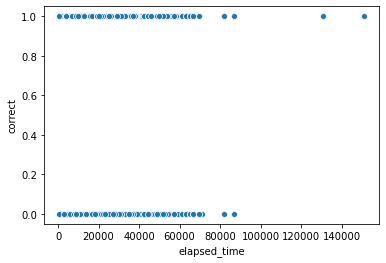

In [14]:
sns.scatterplot(x='elapsed_time', y='correct', data=KTMQt_u1)

In [15]:
#sns.pairplot(KTMQt_u1)

<h1>Column Label Metadata</h1> <p>
<b> timestamp </b> is the moment the question was given, represented as Unix timestamp in milliseconds. <p>
<b> solving_id </b> represents each learning session of students corresponds to each bundle. It is a form of single integer, starting from 1.<p>
<b> question_id </b>is the ID of the question that given to student, which is a form of q{integer}. <p>
<b> user_answer </b>is the answer that the student submitted, recorded as a character between a and d inclusively.<p>
<b> elapsed_time </b> is the time that the students spends on each question in milliseconds.

In [16]:
# Data Types
KTMQt_u1.dtypes

user_id            object
timestamp           int64
solving_id        float64
question_id        object
user_answer        object
elapsed_time      float64
action_type        object
item_id            object
source             object
platform           object
cursor_time       float64
bundle_id          object
explanation_id     object
correct_answer     object
part                int64
tags               object
deployed_at         int64
correct             int64
score             float64
dtype: object

In [17]:
# Description of the Columns 
KTMQt_u1.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,3832.0,1.558805e+12,6.080532e+09,1.547540e+12,1.555577e+12,1.559116e+12,1.561862e+12,1.574701e+12
solving_id,3832.0,1.226017e+03,7.149452e+02,1.000000e+00,5.997500e+02,1.201000e+03,1.846250e+03,2.528000e+03
elapsed_time,3832.0,2.360903e+04,1.217725e+04,6.660000e+02,1.600000e+04,2.175000e+04,2.775000e+04,1.510000e+05
cursor_time,3832.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
part,3832.0,4.533403e+00,1.772769e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00
deployed_at,3832.0,1.475817e+12,3.358857e+11,-1.000000e+00,1.523424e+12,1.561367e+12,1.568636e+12,1.574066e+12
correct,3832.0,7.395616e-01,4.389311e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
score,3832.0,7.395616e-01,1.443478e-15,7.395616e-01,7.395616e-01,7.395616e-01,7.395616e-01,7.395616e-01


In [18]:
KTMQt_u1['user_id'].value_counts(normalize=True)

u1247    1.0
Name: user_id, dtype: float64

In [19]:
KTMQt_u1['timestamp'].value_counts(normalize=True)

1574573336000    0.000783
1574609865000    0.000783
1574573639000    0.000783
1574609951000    0.000783
1574609295000    0.000783
                   ...   
1560666452314    0.000261
1558791193990    0.000261
1553675367812    0.000261
1562314204570    0.000261
1560661182645    0.000261
Name: timestamp, Length: 3775, dtype: float64

In [20]:
KTMQt_u1['solving_id'].value_counts(normalize=True)

468.0     0.002088
403.0     0.002088
1860.0    0.001566
153.0     0.001305
1150.0    0.001305
            ...   
2178.0    0.000261
2189.0    0.000261
2187.0    0.000261
2433.0    0.000261
1.0       0.000261
Name: solving_id, Length: 2528, dtype: float64

In [21]:
KTMQt_u1['question_id'].value_counts(normalize=True)

q1316     0.001305
q6206     0.001044
q877      0.001044
q526      0.001044
q6760     0.001044
            ...   
q11087    0.000261
q6235     0.000261
q1707     0.000261
q5404     0.000261
q8074     0.000261
Name: question_id, Length: 3440, dtype: float64

In [22]:
KTMQt_u1['user_answer'].value_counts(normalize=True)

b    0.279489
c    0.271138
a    0.244259
d    0.205115
Name: user_answer, dtype: float64

In [23]:
# KTMQt_u1['elapsed_time'].value_counts(normalize=True)

In [24]:
KTMQt_u1['action_type'].value_counts(normalize=True)

0    1.0
Name: action_type, dtype: float64

In [25]:
KTMQt_u1['item_id'].value_counts(normalize=True)

0    1.0
Name: item_id, dtype: float64

In [26]:
KTMQt_u1['source'].value_counts(normalize=True)

0    1.0
Name: source, dtype: float64

In [27]:
KTMQt_u1['platform'].value_counts(normalize=True)

0    1.0
Name: platform, dtype: float64

In [28]:
KTMQt_u1['cursor_time'].value_counts(normalize=True)

0.0    1.0
Name: cursor_time, dtype: float64

In [29]:
# range of values
print('timestamp: '); print(df1['timestamp'].min()); print(df1['timestamp'].max()), print('---')

print('elapsed_time: '); print(df1['elapsed_time'].min()); print(df1['elapsed_time'].max()); print('---')

print('cursor_time: '); print(df1['cursor_time'].min()); print(df1['cursor_time'].max()); print('---')

timestamp: 
1547507898390
1574701033000
---
elapsed_time: 
666.0
151000.0
---
cursor_time: 
0.0
420884.0
---


In [30]:
KTMQt_u1.isnull().sum()

user_id           0
timestamp         0
solving_id        0
question_id       0
user_answer       0
elapsed_time      0
action_type       0
item_id           0
source            0
platform          0
cursor_time       0
bundle_id         0
explanation_id    0
correct_answer    0
part              0
tags              0
deployed_at       0
correct           0
score             0
dtype: int64

In [31]:
from pandas_profiling import ProfileReport
prof = ProfileReport(KTMQt_u1)
# prof.to_notebook_iframe()
# prof.to_file(output_file='./KTMQt_u1.html')